### Box Filter

In [0]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('Fig3.35(a).jpg',0)

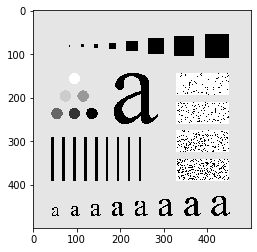

In [70]:
plt.imshow(img,cmap='gray')

In [71]:
print(img, " shape =", img.shape , " size =", img.size)

[[229 229 229 ... 229 255 255]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 ...
 [229 229 229 ... 229 230 229]
 [229 229 229 ... 230 229 229]
 [229 229 229 ... 229 229 254]]  shape = (500, 500)  size = 250000


In [0]:
from skimage.util import random_noise

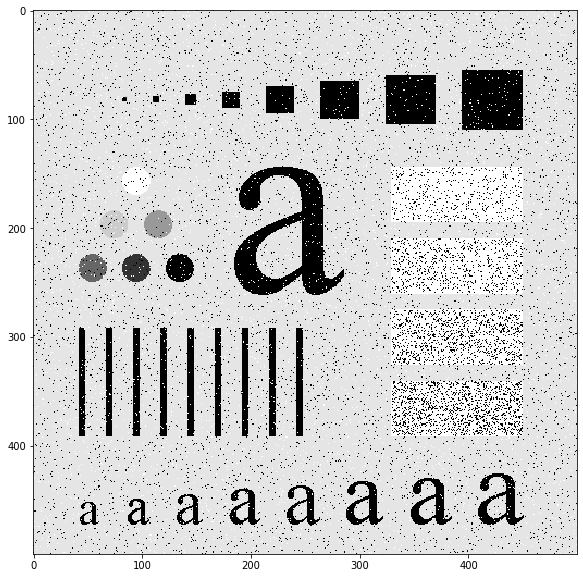

In [74]:
img_sp = random_noise(img, "s&p" )
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
plt.imshow(img_sp,cmap='gray')

### A function for box filter that takes an input image and size of kernel

In [0]:
def median_filter(img,kernel_size):
    kernel = np.ones([kernel_size,kernel_size])
    kernel_box_filter = kernel/(kernel.shape[0]*kernel.shape[1])
    img_h = img.shape[0]
    img_w = img.shape[1]
    ker_h = kernel_box_filter.shape[0]
    ker_w = kernel_box_filter.shape[1]
    pad = (ker_h-1)//2
    img_padded = np.pad(img,pad)
    img_out = np.ones((img_h,img_w))
    img_padded_h = img_padded.shape[0]
    img_padded_w = img_padded.shape[1]
    for i in np.arange(pad, img_padded_h - pad):
        for j in np.arange(pad, img_padded_w - pad):
            mask = img_padded[i - pad:i + pad + 1, j - pad:j + pad + 1]
            median = np.median(mask)
            img_out[i - pad, j - pad] = median
    img_out = (img_out/img_out.size)*255
    return img_out

In [0]:
img_out = median_filter(img_sp, 3)

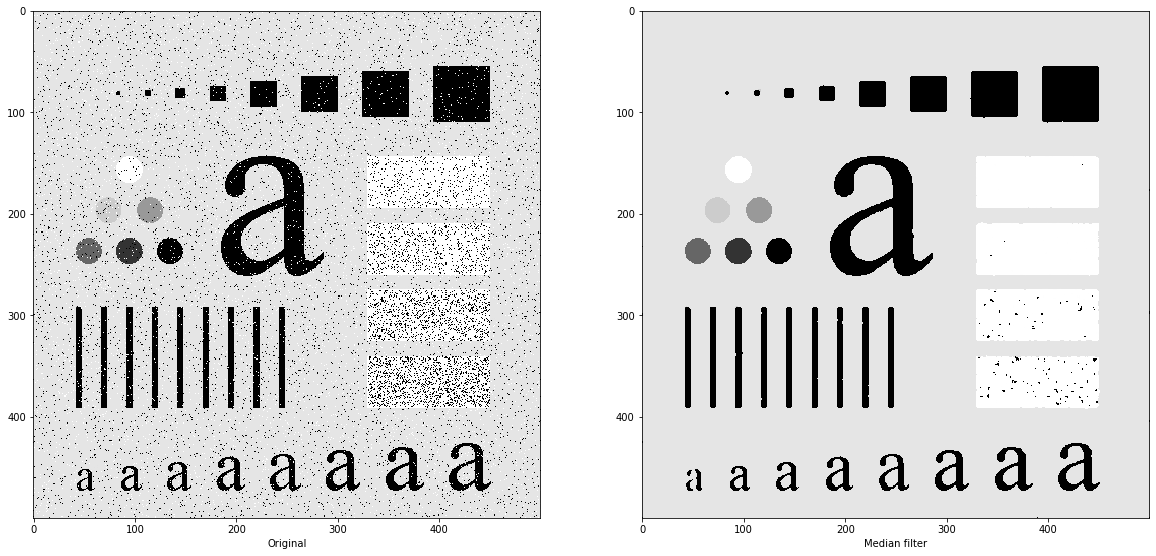

In [77]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_sp,cmap='gray')
plt.xlabel('Original')

plt.subplot(1,2,2)
plt.imshow(img_out,cmap='gray')
plt.xlabel('Median filter')


plt.show()